

##Raged project



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
dataframe="/content/sales_predictions.csv"
df= pd.read_csv(dataframe)
df.shape

(8523, 12)

In [2]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
df.duplicated(keep="first").sum()


0

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df["Item_Weight"].value_counts(dropna=False).mean()

20.48798076923077

In [7]:
df["Item_Weight"].fillna(value=20.48, inplace=True) 
# the mean of item weight whas that number so to no damange the high or low we put that one

In [8]:
df["Outlet_Size"].fillna(value="Not apply", inplace=True) 
#  size dosent apply to a fruit

In [9]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Not apply,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Not apply,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
df.Item_Identifier.isnull().sum()

0

In [11]:
df.Outlet_Size.isnull().sum()

0

In [12]:
df.Item_Weight.value_counts()

20.480    1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [13]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [14]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [16]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("LF", "Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("reg", "Regular")
df["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("low fat", "Low Fat")          

In [17]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
df.Item_Fat_Content.value_counts(dropna=False,normalize=True).round(2)

Low Fat    0.65
Regular    0.35
Name: Item_Fat_Content, dtype: float64

In [19]:
df.loc[:].describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,14.166047,0.066132,140.992782,1997.831867,2181.288914
std,5.110996,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,14.500000,0.053931,143.012800,1999.000000,1794.331000
75%,19.500000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [21]:
data_type= df.dtypes
str_cols=data_type[data_type=="object"]
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

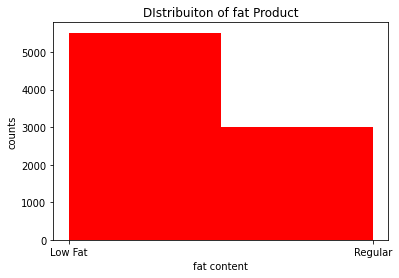

In [23]:
plt.hist(df.Item_Fat_Content, color="Red", bins=2)
plt.xlabel("fat content")
plt.ylabel("counts")
plt.title("DIstribuiton of fat Product");

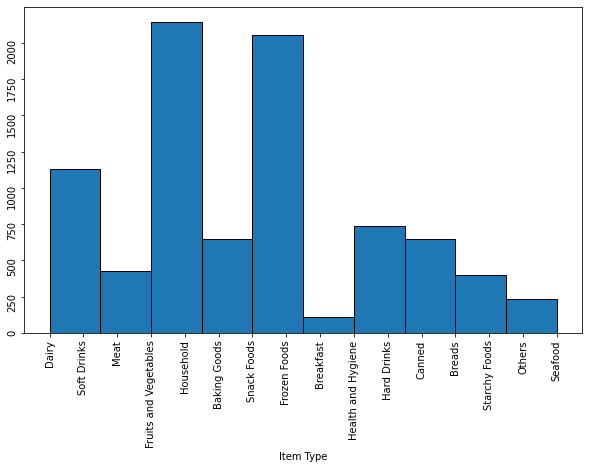

In [24]:
df["Item_Type"].value_counts()
plt.figure(figsize=(10,6))
plt.hist(df.Item_Type, edgecolor="Black")
plt.xlabel("Item Type",)
sns.set_context(context=None, font_scale=10, rc=None)
plt.xticks()
plt.tick_params(labelrotation=90)

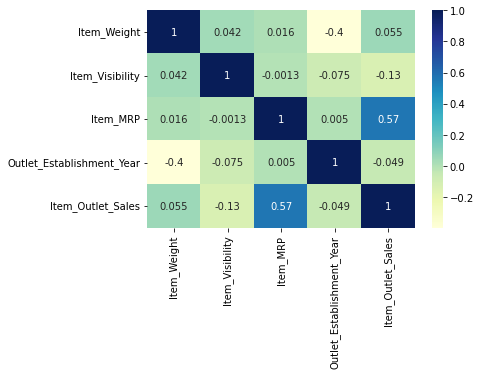

In [25]:
corr=df.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True);

In [26]:
# lowfat=df.loc[df["Item_Fat_Content"]=="Low Fat"]
# itemdiary= df.loc[df["Item_Type"]=="Diary"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


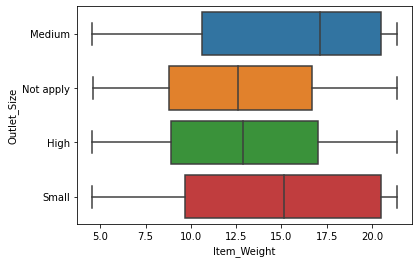

In [27]:
sns.boxplot("Item_Weight","Outlet_Size",data=df);

here we can see the size of the profuct compare to there weight

Text(0.5, 1.0, 'Outlet Sales By Type of Market ')

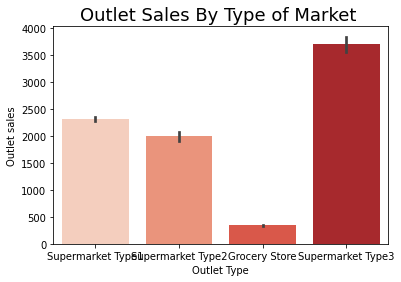

In [28]:
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",palette="Reds",data=df);
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel("Outlet Type")
plt.ylabel("Outlet sales");
plt.title("Outlet Sales By Type of Market ", fontsize=18)

we can see Here the Outlet sales they are bigger in the type No3 of the supermarket

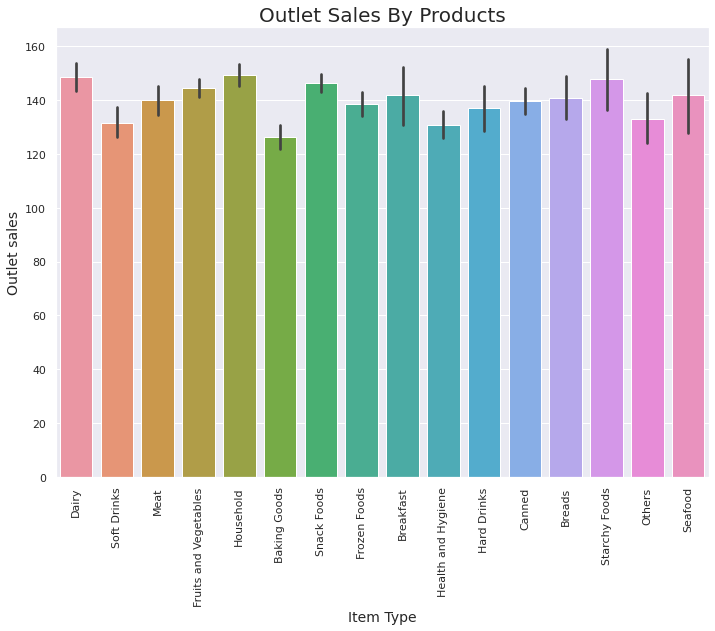

In [29]:
sns.barplot(x="Item_Type",y="Item_MRP", data=df)
sns.set(rc={'figure.figsize':(12.7,8.27)})
plt.xlabel("Item Type",fontsize=14)
plt.ylabel("Outlet sales", fontsize=14)
plt.xticks(rotation=90);
plt.title("Outlet Sales By Products", fontsize=20);

the sales they are almos equal in every itemm 

In [30]:
df["Item_Weight"].describe()

count    8523.000000
mean       14.166047
std         5.110996
min         4.555000
25%         9.310000
50%        14.500000
75%        19.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [31]:
light= df.loc[df.Item_Weight <=9.0].count()[0]
medium= df.loc[(df.Item_Weight >9.0) & (df.Item_Weight <19.5)].count()[0]
heavy = df.loc[df.Item_Weight > 19.5].count()[0]
# light
# filters ready to make our pie

In [32]:
pie =[light, medium, heavy]
labels=["less then 9.0 lb", "between 9 and 19.5lb","More then 19.5"]

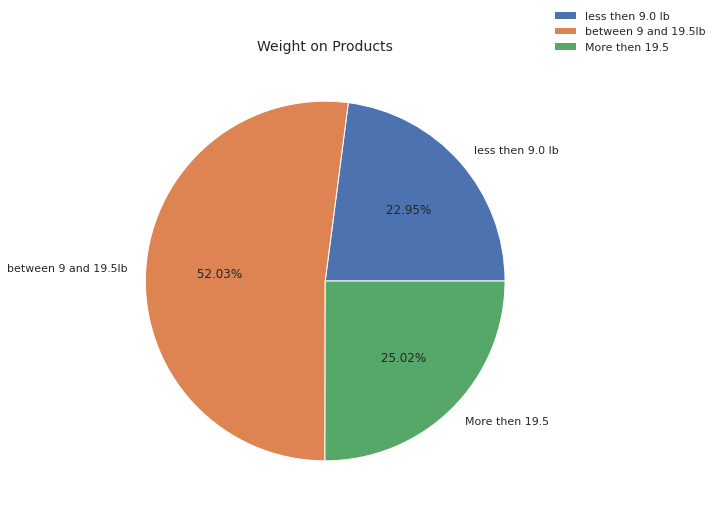

In [33]:
plt.pie(pie,labels=labels,autopct='% .2f%%')
plt.style.use("seaborn")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(loc=(1,1))
plt.title("Weight on Products", fontsize=14);

this is the porcentage of the products by Weight that could be i help in cost of Transportation

In [34]:
df1= pd.read_csv("/content/sales_predictions.csv")

In [35]:
X= df1.drop(columns="Item_Outlet_Sales")
y= df1["Item_Outlet_Sales"]
# im dowloading again the original data since we clean the data in other assigments

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)
# splinting the data help to avoin leakage

In [37]:
# step 1 selectors; to separate the object for the numbers and treat diferents
# since one we scaled and the other encorder
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
cat_selector(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display="diagram")
# librarys on 

In [39]:
# simple imputers that the median in the numbers that way is going to find the medium in the data an fillna with that
# the most frequent in the categorical since we nned the Fillna with the most comun to not contamined too much our data
median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler=StandardScaler()
ohe= OneHotEncoder(sparse=False, handle_unknown="ignore")

In [40]:
# 2 pipelines to its like a superfunctions
procesador= make_pipeline(median_imputer,scaler)
procesador2=make_pipeline(freq_imputer,ohe)
procesador

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [41]:
procesador2

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [42]:
# 2 tuples to put our pipele and the data together 
num_tuple = (median_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)
# the make column is to put the tuples in new columns
columnfinal= make_column_transformer(num_tuple, cat_tuple)
columnfinal

ColumnTransformer(transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49399d5450>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49399d5490>)])

In [43]:
# this one is to put our data into our train
columnfinal.fit(X_train)

ColumnTransformer(transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49399d5450>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49399d5490>)])

In [44]:
# this is the ende of the data
columnfinaloutput= columnfinal.transform(X_train)
columnfinaloutput2= columnfinal.transform(X_test)